In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import pyarrow.parquet as pq

In [2]:
data2 = pd.read_csv('/content/drive/MyDrive/data_2_modified.csv' , encoding= 'latin-1' , nrows = 10000)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Description                   10000 non-null  object 
 1   Base Unit of Measure          10000 non-null  object 
 2   Inventory Posting Group       10000 non-null  object 
 3   Allow Invoice Disc_           10000 non-null  int64  
 4   Statistics Group              10000 non-null  int64  
 5   Commission Group              10000 non-null  int64  
 6   Unit Price                    10000 non-null  float64
 7   Price_Profit Calculation      10000 non-null  int64  
 8   Profit _                      10000 non-null  float64
 9   Costing Method                10000 non-null  int64  
 10  Unit Cost                     10000 non-null  float64
 11  Standard Cost                 10000 non-null  float64
 12  Last Direct Cost              10000 non-null  float64
 13  In

In [3]:
data2.columns

Index(['Description', 'Base Unit of Measure', 'Inventory Posting Group',
       'Allow Invoice Disc_', 'Statistics Group', 'Commission Group',
       'Unit Price', 'Price_Profit Calculation', 'Profit _', 'Costing Method',
       'Unit Cost', 'Standard Cost', 'Last Direct Cost', 'Indirect Cost _',
       'Cost is Adjusted', 'Allow Online Adjustment', 'Vendor No_',
       'Last DateTime Modified', 'Last Date Modified', 'Last Time Modified',
       'VAT Bus_ Posting Gr_ (Price)', 'Gen_ Prod_ Posting Group', 'Lot Size',
       'Sales Unit of Measure', 'Purch_ Unit of Measure', 'Product Manager',
       'Last Modified by User', 'Unit Price Including VAT', 'Product Size'],
      dtype='object')

In [4]:
data2 = data2[['Description', 'Base Unit of Measure' , 'Inventory Posting Group',  'Allow Invoice Disc_' ,  'Unit Price',
              'Profit _' , 'Unit Cost' ,  'Vendor No_' , 'Last Date Modified' , 'Product Manager' ]]
data2.head()

,Description,Base Unit of Measure,Inventory Posting Group,Allow Invoice Disc_,Unit Price,Profit _,Unit Cost,Vendor No_,Last Date Modified,Product Manager
0,COFFEE DOUBLE DARK,EACH,INV,1,96.45000,20.28988,76.88041,6,6/24/2024,MAGDY EL-SHERIF
1,COFFEE DOUBLE DARK,EACH,INV,1,191.95000,15.62855,161.95099,6,6/24/2024,MAGDY EL-SHERIF
2,COFFEE DOUBLE LIGHT,EACH,INV,1,96.45000,16.43905,80.59454,6,7/4/2024,MAGDY EL-SHERIF
3,COFFEE DOUBLE LIGHT,EACH,INV,1,191.95000,16.20432,160.84580,6,5/8/2023,MAGDY EL-SHERIF
4,COFFEE ESPRESSO,EACH,INV,1,21.71053,51.63637,19.00000,6,6/24/2024,MAGDY EL-SHERIF


In [5]:
data2.shape


(10000, 10)

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              10000 non-null  object 
 1   Base Unit of Measure     10000 non-null  object 
 2   Inventory Posting Group  10000 non-null  object 
 3   Allow Invoice Disc_      10000 non-null  int64  
 4   Unit Price               10000 non-null  float64
 5   Profit _                 10000 non-null  float64
 6   Unit Cost                10000 non-null  float64
 7   Vendor No_               9999 non-null   object 
 8   Last Date Modified       10000 non-null  object 
 9   Product Manager          5361 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 781.4+ KB


In [7]:
data2.drop(columns = 'Product Manager' , inplace = True)

In [8]:
# because of wrong calulation of "Profit Column" , i will remove it and recalculate it
data2.drop(columns = 'Profit _' , inplace = True)
data2['Profit'] = data2['Unit Price'] - data2['Unit Cost']
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              10000 non-null  object 
 1   Base Unit of Measure     10000 non-null  object 
 2   Inventory Posting Group  10000 non-null  object 
 3   Allow Invoice Disc_      10000 non-null  int64  
 4   Unit Price               10000 non-null  float64
 5   Unit Cost                10000 non-null  float64
 6   Vendor No_               9999 non-null   object 
 7   Last Date Modified       10000 non-null  object 
 8   Profit                   10000 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


In [9]:
data2 = data2.drop_duplicates()
data2.dropna(subset = 'Vendor No_' , inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9806 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              9806 non-null   object 
 1   Base Unit of Measure     9806 non-null   object 
 2   Inventory Posting Group  9806 non-null   object 
 3   Allow Invoice Disc_      9806 non-null   int64  
 4   Unit Price               9806 non-null   float64
 5   Unit Cost                9806 non-null   float64
 6   Vendor No_               9806 non-null   object 
 7   Last Date Modified       9806 non-null   object 
 8   Profit                   9806 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 766.1+ KB


<ipython-input-9-2cf53e0e0b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(subset = 'Vendor No_' , inplace = True)


In [10]:
px.box(data_frame = data2 , x = 'Unit Price')

In [11]:
px.box(data_frame = data2 , x = 'Unit Cost')

In [12]:
px.box(data_frame = data2 , x = 'Profit')

In [13]:
data2 = data2[
    (data2['Unit Price'] < 8000) &
    (data2['Unit Cost'] < 8000) &
    (data2['Profit'] < 900)
]
data2.shape

(9797, 9)

In [14]:
data2.sample(5)

,Description,Base Unit of Measure,Inventory Posting Group,Allow Invoice Disc_,Unit Price,Unit Cost,Vendor No_,Last Date Modified,Profit
7235,KOFTA,EACH,INV,1,35.7500,32.50,691,7/2/2019,3.2500
2310,BISCUIT W/VANILLA CREAM,EACH,INV,1,9.2500,8.01,1417,7/7/2019,1.2400
4899,CONDITIONER PANTH.&PROVITAMIN,EACH,INV,1,13.4211,10.82,290,8/18/2014,2.6011
3633,PINEAPPLE POWDER JUICE,EACH,INV,1,0.3097,0.25,1153,10/12/2010,0.0597
4155,CLEANING RUBBER BRUSH,EACH,INV,1,56.0965,42.12,28,7/4/2019,13.9765


In [15]:
cols = ['Inventory Posting Group', 'Base Unit of Measure']
for x in cols :
  print("the unique values of {} is {}".format(x , data2[x].unique()))

the unique values of Inventory Posting Group is ['INV' 'CONS']
the unique values of Base Unit of Measure is ['EACH' 'KG']


In [16]:
data2[data2['Description'] == 'OLIVE OIL']

,Description,Base Unit of Measure,Inventory Posting Group,Allow Invoice Disc_,Unit Price,Unit Cost,Vendor No_,Last Date Modified,Profit
833,OLIVE OIL,EACH,INV,1,324.25,279.06159,2295,12/20/2020,45.18841
834,OLIVE OIL,EACH,INV,1,121.95,268.47000,2295,12/20/2020,-146.52000
835,OLIVE OIL,EACH,INV,1,237.95,498.82000,2295,7/12/2023,-260.87000
870,OLIVE OIL,EACH,INV,1,84.95,65.96000,205,7/4/2019,18.99000
872,OLIVE OIL,EACH,INV,1,182.50,162.96000,205,9/12/2019,19.54000


In [17]:
top_10_products = data2['Description'].value_counts().sort_values(ascending = False).head(10)
top_10_products

Description
ORANGE JUICE      19
MANGO JUICE       19
NATURAL LOOFAH    18
BASMATI RICE      16
APPLE JUICE       16
FACIAL TISSUES    16
MINERAL WATER     15
COCKTAIL JUICE    15
GUAVA JUICE       15
BEEF BURGER       13
Name: count, dtype: int64

In [18]:
px.bar(top_10_products, text_auto = True , title = 'Top 10 selling Products ' ,
           color_discrete_sequence = ['#003300'])

In [19]:
most_profitable_products = data2.groupby('Description')['Profit'].sum().sort_values(ascending = False).head(10).round(2)
most_profitable_products

Description
BASMATI RICE                      864.44
G-SHOT P633                       862.52
OVEN ELECTRIC 2044 X              645.91
OVEN (GAS) 2045 X                 645.91
VERTICAL DIGITAL SILVER 5750      641.17
G-SHOT P533                       631.20
OVEN (GAS ) 108-50 X              573.82
BUILTIN ELECTR 5EYES 77-005 SS    567.75
PROJECTOR XVGA EMP-X3             565.05
OVEN (GAS ) 107-90 C              560.46
Name: Profit, dtype: float64

In [20]:
px.bar(most_profitable_products, text_auto = True , title = 'Most 10 Profitable Products ' ,
           color_discrete_sequence = ['#009900'])

In [21]:
least_profitable_products = data2.groupby('Description')['Profit'].sum().sort_values(ascending = True).head(10).round(2)
least_profitable_products

Description
BUTTER OIL EXCELLENT           -342.75
ANIMAL GHEE                    -336.44
OLIVE OIL                      -323.67
SWISS EMMENTALåÊCHEESE         -186.45
MILK CHOCOLATE W/HAZELNUT      -170.53
COFFEE INSTANT DECAFFEINATED   -146.75
CHINESE GARLIC                 -135.55
ALMARAI DRY SMOKED SALAMI      -135.05
CHOCOLATE W/MILK               -128.88
SWISS PREMIUM DARK CHOCOLATE   -128.88
Name: Profit, dtype: float64

In [22]:
data2['Profit_per_Cost'] = data2['Profit'] / data2['Unit Cost']
most_profitable_products_per_cost = data2.groupby('Description')['Profit_per_Cost'].sum().sort_values(ascending = False).iloc[1:6].round(2)
most_profitable_products_per_cost


Description
ESSENTIAL FLOSS UNWAXED              508.89
SOAP EXTRA CARE                      126.01
TOOTHPASTE GEL                        93.81
HAIR STYLING GEL WITH HONEY           19.78
HAIR STYLING GEL W/PRO VITAMIN B5     19.60
Name: Profit_per_Cost, dtype: float64

In [23]:
px.bar(most_profitable_products_per_cost, text_auto = True , title = 'Most Profitable Products Per Cost Except "Burger"' ,
           color_discrete_sequence = ['#00e600'])

In [24]:
px.bar(data2['Vendor No_'].value_counts().sort_values(ascending = False).head(10) , title = "Most Vendor Sell Products" , color_discrete_sequence = ['#000066']
       , text_auto = True)


In [25]:
px.pie(data_frame = data2 , names = 'Base Unit of Measure' , color_discrete_sequence= ['#000066' , '#cc0000'] , title = 'Distributon of Unit of Measure')

In [26]:
data2['Last Date Modified'] = pd.to_datetime(data2['Last Date Modified'])
profit_over_years = data2.groupby(data2['Last Date Modified'].dt.to_period('Y'))['Profit'].sum()
profit_over_years.index = profit_over_years.index.to_timestamp()
# plt.figure(figsize=(20, 12))
# plt.plot(profit_over_years.index, profit_over_years.values, marker='o' , color = 'green')
# plt.title('Frequency Of Profit Over Years')
# plt.xlabel('Year')
# plt.ylabel('Total Profit')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()
px.line(profit_over_years.reset_index() , x = 'Last Date Modified' , y = 'Profit' , title = 'Frequency Of Profit Over Years' , color_discrete_sequence = ['#009900'])

In [29]:
profit_over_years

Last Date Modified
2009-01-01    29515.28056
2010-01-01     1082.18070
2011-01-01     1629.84870
2012-01-01     6400.92460
2013-01-01      664.75905
2014-01-01     1584.58993
2015-01-01     3708.80742
2016-01-01      947.43629
2017-01-01     4814.75675
2018-01-01     1910.19399
2019-01-01    11780.09495
2020-01-01     1168.55045
2021-01-01     3974.56491
2022-01-01     1685.79706
2023-01-01     6059.31757
2024-01-01    15190.65578
Freq: AS-JAN, Name: Profit, dtype: float64

In [30]:
profit_over_years.resample('M').sum()

Last Date Modified
2009-01-31    29515.28056
2009-02-28        0.00000
2009-03-31        0.00000
2009-04-30        0.00000
2009-05-31        0.00000
                 ...     
2023-09-30        0.00000
2023-10-31        0.00000
2023-11-30        0.00000
2023-12-31        0.00000
2024-01-31    15190.65578
Freq: M, Name: Profit, Length: 181, dtype: float64

In [27]:
data2.columns

Index(['Description', 'Base Unit of Measure', 'Inventory Posting Group',
       'Allow Invoice Disc_', 'Unit Price', 'Unit Cost', 'Vendor No_',
       'Last Date Modified', 'Profit', 'Profit_per_Cost'],
      dtype='object')

In [28]:
data2['Allow Invoice Disc_'].unique()

array([1])

RMSE: 4223.083013474309


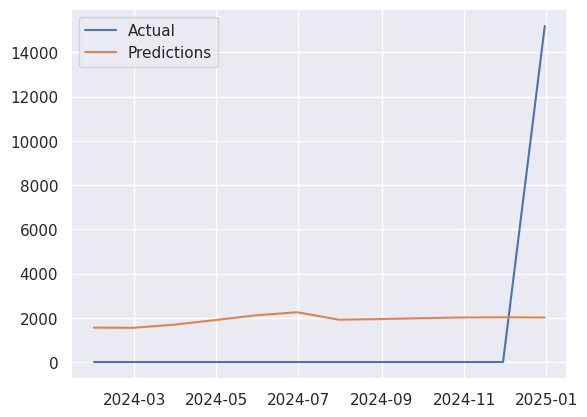

In [49]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare the data for time series forecasting
profit_over_years = profit_over_years.resample('M').sum()  # Resample to monthly frequency

# Split the data into training and testing sets
train_data = profit_over_years[:-12]  # Use all but the last 12 months for training
test_data = profit_over_years[-12:]  # Use the last 12 months for testing

# Fit an ARIMA model to the training data
# (5, 1, 0) are example parameters, you might need to tune these
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(profit_over_years)-1)

# Evaluate the model
rmse = mean_squared_error(test_data, predictions, squared=False)
print('RMSE:', rmse)

# Plot the predictions against the actual values
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.show()